In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [16]:
data = pd.read_csv('/content/drive/MyDrive/Capstone Project/Data/MENDELEY_DATA.csv')
data.head()

,OG_Text,Bully,Clean_Text,Preprocessed_Text
0,`- This is not ``creative``. Those are the di...,None,`- This is not ``creative``. Those are the dic...,creativ dictionari definit term insur ensur pr...
1,` :: the term ``standard model`` is itself le...,None,` :: the term ``standard model`` is itself les...,term standard model npov think prefer new-ag s...
2,"True or false, the situation as of March 200...",None,"True or false, the situation as of March was s...",true fals situat march saudi propos land peac ...
3,"Next, maybe you could work on being less cond...",None,"Next, maybe you could work on being less conde...",mayb work condescend suggest read name convent...
4,This page will need disambiguation.,None,This page will need disambiguation.,page need disambigu


In [17]:
data = data.astype(str)

In [18]:
len(data)

331768

#**IMPORT NLTK**

In [6]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

#**WORD COUNT**

In [19]:
data['Word count'] = [len(i) for i in data['Clean_Text']]
data.head()

,OG_Text,Bully,Clean_Text,Preprocessed_Text,Word count
0,`- This is not ``creative``. Those are the di...,None,`- This is not ``creative``. Those are the dic...,creativ dictionari definit term insur ensur pr...,2362
1,` :: the term ``standard model`` is itself le...,None,` :: the term ``standard model`` is itself les...,term standard model npov think prefer new-ag s...,707
2,"True or false, the situation as of March 200...",None,"True or false, the situation as of March was s...",true fals situat march saudi propos land peac ...,321
3,"Next, maybe you could work on being less cond...",None,"Next, maybe you could work on being less conde...",mayb work condescend suggest read name convent...,421
4,This page will need disambiguation.,None,This page will need disambiguation.,page need disambigu,35


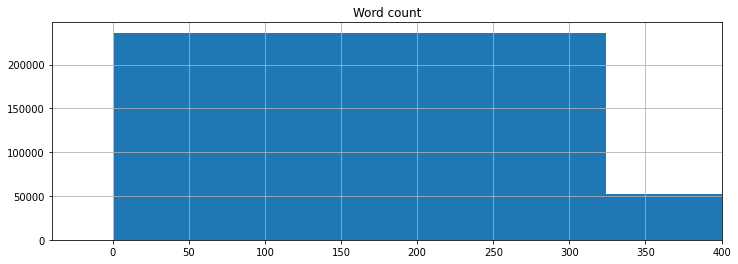

In [20]:
data.hist(column='Word count',bins=60,figsize=(12,4));
plt.xlim(-40,400);

# **VADER SENTIMENT ANALYSIS**

In [21]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

https://analyticsindiamag.com/sentiment-analysis-made-easy-using-vader/

The more Compound score closer to +1, the higher the positivity of the text. Above text is 49.2% Positive, 0% Negative, 50.8% Neutral.

In [23]:
def sentiment(scores):
  del scores['compound']
  maxi = max(zip(scores.values(), scores.keys()))[1]
  if maxi == 'pos' : return "Positive"
  elif maxi == 'neg' : return "Negative"
  elif maxi == 'neu'  : return "Neutral"

def compound(scores):
  return scores['compound']

def positive(scores):
  return scores['pos']

def negative(scores):
  return scores['neg']

def neutral(scores):
  return scores['neu']

def vader(doc, col):
  analyzer = SentimentIntensityAnalyzer()
  doc['Sentiment'] = doc[col].apply(lambda x: sentiment(analyzer.polarity_scores(x)))
  doc['Compound Score'] = doc[col].apply(lambda x: compound(analyzer.polarity_scores(x)))
  doc['Positive Score'] = doc[col].apply(lambda x: positive(analyzer.polarity_scores(x)))
  doc['Negative Score'] = doc[col].apply(lambda x: negative(analyzer.polarity_scores(x)))
  doc['Neutral Score'] = doc[col].apply(lambda x: neutral(analyzer.polarity_scores(x)))

  return doc

In [24]:
data_sen = vader(data, 'Clean_Text')

In [25]:
data_sen.head()

,OG_Text,Bully,Clean_Text,Preprocessed_Text,Word count,Sentiment,Compound Score,Positive Score,Negative Score,Neutral Score
0,`- This is not ``creative``. Those are the di...,None,`- This is not ``creative``. Those are the dic...,creativ dictionari definit term insur ensur pr...,2362,Neutral,-0.9895,0.092,0.164,0.744
1,` :: the term ``standard model`` is itself le...,None,` :: the term ``standard model`` is itself les...,term standard model npov think prefer new-ag s...,707,Neutral,0.7015,0.077,0.041,0.882
2,"True or false, the situation as of March 200...",None,"True or false, the situation as of March was s...",true fals situat march saudi propos land peac ...,321,Neutral,0.7430,0.101,0.000,0.899
3,"Next, maybe you could work on being less cond...",None,"Next, maybe you could work on being less conde...",mayb work condescend suggest read name convent...,421,Neutral,-0.6269,0.100,0.157,0.744
4,This page will need disambiguation.,None,This page will need disambiguation.,page need disambigu,35,Neutral,0.0000,0.000,0.000,1.000


In [26]:
data['Sentiment'].value_counts()

Neutral     321061
Negative      6276
Positive      4431
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment value Counts')

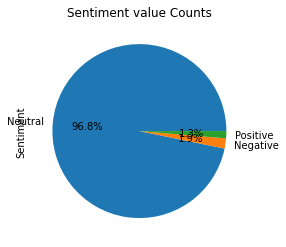

In [27]:
data_sen['Sentiment'].value_counts().plot.pie(autopct ='%1.1f%%').set_title('Sentiment value Counts')

#**COMPARISON**

In [28]:
comp = data_sen

In [29]:
label = {'Positive':'Proper', 'Neutral':'Proper', 'Negative':'Improper'}
comp['SA'] = comp['Sentiment'].apply(lambda x: label[x])

In [30]:
label = {'None': 'Proper', 'Toxic':'Improper', 'Aggression':'Improper', 'Sexism':'Improper', 'Racism':'Improper', 'Misconduct':'Improper'}
comp['OG'] = comp['Bully'].apply(lambda x: label[x])

In [31]:
comp['SA'].value_counts()

Proper      325492
Improper      6276
Name: SA, dtype: int64

Text(0.5, 1.0, 'Proper vs. Improper')

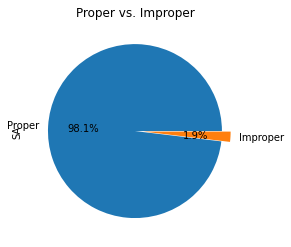

In [32]:
comp['SA'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%').set_title('Proper vs. Improper')

In [33]:
comp['OG'].value_counts()

Proper      289056
Improper     42712
Name: OG, dtype: int64

Text(0.5, 1.0, 'Proper vs. Improper')

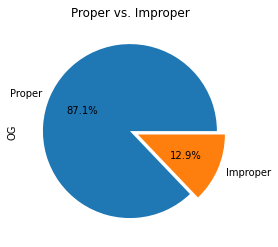

In [34]:
comp['OG'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%').set_title('Proper vs. Improper')

#**HIDE**

In [ ]:
data_mod = data_sen

In [ ]:
count = 0
for i in range(len(data_mod)):
  if data_mod.Sentiment[i] == 'Neutral' and data_mod.Bully[i] != 'None' and data_mod.Bully[i] != '': 
    data_mod.Sentiment[i] = 'Negative'
    count = count+1
  elif data_mod.Sentiment[i] == 'Positive' and data_mod.Bully[i] != 'None' and data_mod.Bully[i] != '': 
    data_mod.Sentiment[i] = 'Negative'
    count = count+1

print(count)

In [ ]:
data_mod['Sentiment'].value_counts()

In [ ]:
data_mod['Sentiment'].value_counts().plot.pie(autopct ='%1.1f%%').set_title('Sentiment value Counts')

# **TRIAL CONV ID**

*   1st-predator
*   2nd - if not exists in previous, then complement, else take existing role 
*   Ensure the 1st in EVERY CONVERSATION IS PREDATOR: Verify this
*   Give Conversation ID based on conv and not just zip










In [ ]:
category = ['Predator', 'Victim']
data['Role'] = ''
data[:2]

In [ ]:
def compliment(i):
  if data['Role'][i-1] == 'Predator': return 'Victim'
  else: return 'Predator'

In [ ]:
data['Role'][0] = category[0]
for i in range(1, len(data)):
  if data['Author ID'][i] in list(data['Author ID'][:i]):
    a = [j for j in data.index[data['Author ID']==data['Author ID'][i]] if j<i][-1]
    data['Role'][i] = data['Role'][a]
  else: 
    data['Role'][i] = compliment(i)

In [ ]:
col = ['conversation id', 'message', 'author', 'time', 'text']

In [ ]:
!pip install untangle

In [ ]:
import untangle, csv

# PARSE XML FILE
xml = untangle.parse(train_path)

# CREATE CSV FILE
csvfile = open("/content/drive/MyDrive/Capstone Project/data.csv",'w',encoding='utf-8')
csvfile_writer = csv.writer(csvfile)

# ADD HEADER
csvfile_writer.writerow(col)

# FOR EACH EMPLOYEE
for employee in xml.conversations:

    # EXTRACT EMPLOYEE DETAILS
    csv_line = [employee.id.cdata, employee.message.cdata, employee.author.cdata, employee.time.cdata, employee.text.cdata]

    # ADD NEW ROW TO CSV FILE
    csvfile_writer.writerow(csv_line)